# **Image Processing**

1. *converting an Input image from time domain into frequency domain using fourier transforms*

    Fourier transforms can simply be termed as a frequncy domain transform of time domain based signal processing. Fourier transform is a digtal signal processing technique utilized in solving problems in areas like image processing, video processing etc.

2. *Types of Fourier transforms includes:*


1. Discrete time signal.
    * Aperiodic Discrete time signal.
    * Periodic Discrete time signals.
2. continuous time signal.
    * Aperiodic continuous time signal.
    * Periodic continuous time signal.


images can be represented as a discrete time signals (they are not continuous), therefore the signal 
processing techniques used here is the Discrete Fourier Transforms (DFT). Videos are termed to be 
continuous frames of images, transforms applicable in this case is the continuous fourier transform.

Images are represented as a 3 channel(R, G and B) 2-dimensional array.

Discrete Fourier transforms for an M by N 2 dimensional channel array can be transformed mathematically as:

$$F(k,l) = \sum_{i=0}^{m-1} \sum_{j=0}^{n-1} f(i,j) e^{-2i\pi(\frac{ki}{N}+ \frac{kj}{N})}$$

The inverse Discrete Fourier transform (inverse DFT) can be represented as:

$$F(i,j) = \frac{1}{N^2} \sum_{i=0}^{m-1} \sum_{j=0}^{n-1} f(k,l) e^{2i\pi(\frac{ki}{N}+ \frac{kj}{N})}$$

This equation can also be represented as:

$$F(k,l) = \sum_{i=0}^{m-1} f(a,b) e^{-2i\pi(\frac{ki}{N})}$$

Where,

$$F(a,b)= \sum_{j=0}^{n-1} f(i,j)e^{-2i\pi(\frac{kj}{N})}$$

   ![jupyter logo](transforms.png)

![jupyter logo](transforms2.png)

In [4]:
import sympy

Fourier Transform is used to analyze the frequency characteristics of various filters. For images, 2D Discrete Fourier Transform (DFT) is used to find the frequency domain. A fast algorithm called Fast Fourier Transform (FFT) is used for calculation of DFT. 

### FFT in Numpy

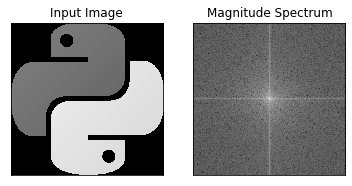

In [18]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('python.png',0)
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 10*np.log(np.abs(fshift))

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

1024 1024 512.0 512.0


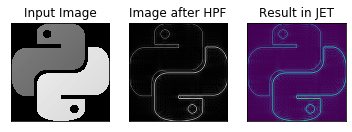

In [19]:
rows, cols = img.shape
crow,ccol = rows/2 , cols/2
print(rows, cols, crow, ccol)
fshift[int(crow)-30:int(crow)+30, int(ccol)-30:int(ccol)+30] = 0
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

plt.subplot(131),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(img_back, cmap = 'gray')
plt.title('Image after HPF'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(img_back)
plt.title('Result in JET'), plt.xticks([]), plt.yticks([])

plt.show()


### FFT in opencv

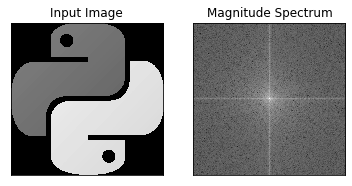

In [20]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('python.png',0)

dft = cv2.dft(np.float32(img),flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

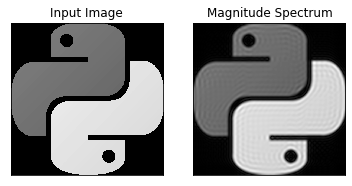

In [21]:
rows, cols = img.shape
crow,ccol = rows/2 , cols/2
crow , ccol = int(crow), int(ccol)
# create a mask first, center square is 1, remaining all zeros
mask = np.zeros((rows,cols,2),np.uint8)
mask[crow-30:crow+30, ccol-30:ccol+30] = 1

# apply mask and inverse DFT
fshift = dft_shift*mask
f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

### laplacian as High pass Filter

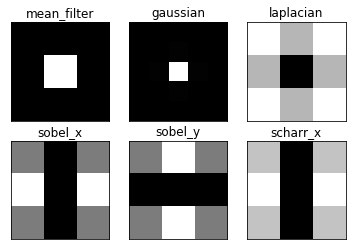

In [23]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# simple averaging filter without scaling parameter
mean_filter = np.ones((3,3))

# creating a guassian filter
x = cv2.getGaussianKernel(5,10)
gaussian = x*x.T

# different edge detecting filters
# scharr in x-direction
scharr = np.array([[-3, 0, 3],
                   [-10,0,10],
                   [-3, 0, 3]])
# sobel in x direction
sobel_x= np.array([[-1, 0, 1],
                   [-2, 0, 2],
                   [-1, 0, 1]])
# sobel in y direction
sobel_y= np.array([[-1,-2,-1],
                   [0, 0, 0],
                   [1, 2, 1]])
# laplacian
laplacian=np.array([[0, 1, 0],
                    [1,-4, 1],
                    [0, 1, 0]])

filters = [mean_filter, gaussian, laplacian, sobel_x, sobel_y, scharr]
filter_name = ['mean_filter', 'gaussian','laplacian', 'sobel_x', \
                'sobel_y', 'scharr_x']
fft_filters = [np.fft.fft2(x) for x in filters]
fft_shift = [np.fft.fftshift(y) for y in fft_filters]
mag_spectrum = [np.log(np.abs(z)+1) for z in fft_shift]

for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(mag_spectrum[i],cmap = 'gray')
    plt.title(filter_name[i]), plt.xticks([]), plt.yticks([])

plt.show()